`sklearn.datasets.make_blobs` 를 사용하여 아래 코드로 데이터를 생성하세요.

- sklearn.datasets.make_blobs 데이터 생성

```
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
```

이 데이터를 4개의 클러스터로 군집화하세요.

Python으로 구현해서 클러스터링하는데, 강의에서 만든 함수 코드를 한 군데 수정해야 한다.


In [2]:
from sklearn.datasets import make_blobs

# 샘플 개수, 클러스터 개수, 클러스터 ㅜㄴ산, 랜덤 스테이터 (클러스터 무작위 생성할떄 시드값)
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [3]:
X

array([[ 6.69786996e-01,  3.59540802e+00],
       [-2.02396992e+00,  7.99569054e+00],
       [ 1.43289271e+00,  4.37679234e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 1.71444449e+00,  5.02521524e+00],
       [ 7.43873988e-01,  4.12240568e+00],
       [-2.04363942e+00,  4.06392123e+00],
       [-6.78603291e-01,  7.88799076e+00],
       [-4.74920358e-02,  5.47425256e+00],
       [-1.46976488e+00,  7.69183251e+00],
       [-8.64176859e-01,  6.86528639e+00],
       [-1.84838498e+00,  6.90859736e+00],
       [-1.27182547e+00,  7.13460392e+00],
       [-9.34289778e-01,  7.73253222e+00],
       [-7.34157408e-01,  7.44484466e+00],
       [ 3.18515794e+00,  8.90082233e-02],
       [ 1.35139348e+00,  2.06383637e+00],
       [-9.70171483e-02,  3.48456995e+00],
       [-1.93150361e+00,  2.93698060e+00],
       [ 2.73890793e+00,  1.56768168e-01],
       [ 2.33812285e+00,  3.43116792e+00],
       [-1.93673697e+00,  7.57276799e+00],
       [-1.98885366e+00,  3.24143178e+00],
       [ 2.

In [2]:
# 행, 열
X.shape

(100, 2)

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

k = 4
centroids = np.array([-3, 3], [-3, 8], [2, 4], [2, 1], dtype = float)
centerids, clusterAssigned = cluster(X, k, centroids)
draw(X, centeroids)

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [8]:
import numpy as np

def normDist(x1, x2):
    # 1. x1 - x2 사이 거리를 제곱근(power)
    # 2. 모두 합침
    # 3. sqrt root 해서 거리를 값을 찾음 
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist


# 분할 클러스터, k(군집의 개수) 를 정해놓는다.
# x=데이터, k=군집(중심점)의 개수, centroids=초기 중심점
def cluster(x, k, centroids):
    row, col = x.shape
    #     k = 2
    
    # clustering 처리결과를 저장하기 위한 저장소를 설정한다. clusterAssigned에는 index, 거리를 저장한다. 1, 2 만큼 생성함
    # 2로 바꾼 이유는 항상 열은 2이다.
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    clusterUpdated=True
    iter = 1
    
    # 반복할 때마다 갱신
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        
        # 모든 row 에 대하여 반복 시작
        for i in range(row):
            
            # 최소 거리에 멋대로 무한 설정
            minDist = np.inf   # set arbitray max to minDist
            # 최소 인덱스에 멋대로 -1 설정 
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            
            # 각 데이터 항목이 중심점과 얼마나 멀리 있는지 계산하기 위해서 거리를 계산한다.
            for j in range(k):
                # 거리 계산
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            # 가장 가까운 클러스터에 할당 
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        
        # 할당 결과(인덱스, 거리) 출력
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))

        # STEP 2: update centroids
        # 현재 클러스터에 할당된 데이터의 평균을 계산해서 새로운 클러스터 c_k의 중심점 m_k를 설정
        # x.shape[1] -> 열
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            # 모든 행의 0번째 값
            # clusterAssigned[:,0] -> 클러스터링 위치
            # x[clusterAssigned[:,0]==cent] ->  cent 지점에 할당된 데이터들 출력
            # axis=0 -> 열로 평균을 구한다. 
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
    
        # STEP 3: see if centroids is updated. STOP if NOT updated
        # Ck와 새로 만든 클러스터와 차이가 없는지 확인한다. 더이상 갱신이 없으면 종료한다. 
        comparison = np.equal(centroids, _centroids) # np.isclose() 는 어느정도 허용하면서 비교 in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.



====== Iteration 1 ======

.....Assigned clusters: 
 [[2.         1.39038171]
 [1.         0.97603959]
 [2.         0.6808694 ]
 [2.         1.07142116]
 [2.         1.06424068]
 [2.         1.26207595]
 [0.         1.43057818]
 [1.         2.32409741]
 [2.         2.52302284]
 [1.         1.56095699]
 [1.         2.41853581]
 [1.         1.58662436]
 [1.         1.93274354]
 [1.         2.08295409]
 [1.         2.33286093]
 [3.         1.4948262 ]
 [3.         1.2459688 ]
 [2.         2.15943258]
 [0.         1.0703532 ]
 [3.         1.1211712 ]
 [2.         0.66173786]
 [1.         1.14588633]
 [0.         1.03957021]
 [3.         1.0773791 ]
 [2.         1.65044584]
 [0.         1.49333913]
 [2.         2.38103961]
 [2.         1.29502248]
 [3.         1.4038348 ]
 [3.         0.79100091]
 [3.         0.47161079]
 [1.         2.40644969]
 [3.         0.37958046]
 [3.         0.97113953]
 [0.         1.90087301]
 [2.         0.86154172]
 [1.         1.75994186]
 [3.         0.65814

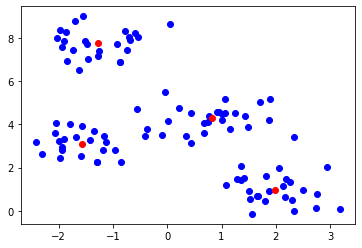

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

k = 4

# 속성의 개수는 2개씩해야 그래프에 plotting(괴하다, 그리다) 이 잘 되는데 
# 4개 3, 4개면 3차원 4차원이어서 보기 힘들다. 3차원까지가 한계
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [16]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

In [21]:
# comparison = np.equal(y, centroids) # np.isclose() 는 어느정도 허용하면서 비교 in case some tolerence is required
# comparison.all() == True

clusterAssigned[:,0]

array([2., 1., 2., 2., 2., 2., 0., 1., 2., 1., 1., 1., 1., 1., 1., 3., 3.,
       2., 0., 3., 2., 1., 0., 3., 2., 0., 2., 2., 3., 3., 3., 1., 3., 3.,
       0., 2., 1., 3., 1., 0., 2., 0., 1., 0., 0., 1., 3., 0., 2., 2., 2.,
       3., 0., 0., 0., 1., 1., 3., 3., 1., 1., 3., 3., 2., 3., 1., 0., 0.,
       3., 2., 1., 3., 2., 1., 2., 2., 0., 0., 3., 3., 3., 1., 0., 2., 3.,
       0., 3., 3., 2., 2., 2., 0., 2., 0., 0., 1., 1., 0., 1., 2.])

In [25]:
comparison = np.equal(y, clusterAssigned[:, 0])
comparison

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])